In [49]:
import pandas as pd
from sklearn.metrics import confusion_matrix

import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.calibration import calibration_curve

In [50]:
df = pd.read_csv("M://project//clinvar_conflicting.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


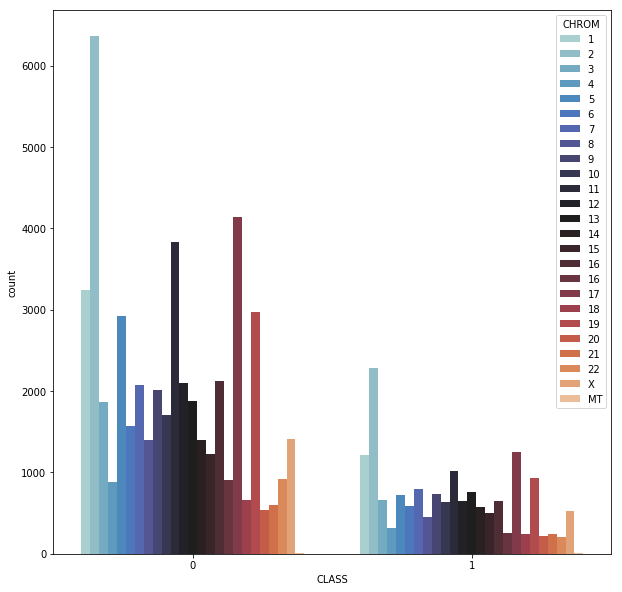

In [51]:
fig = plt.figure(figsize = (10, 10))
sns.countplot(x= 'CLASS', data = df, hue = 'CHROM', palette='icefire')

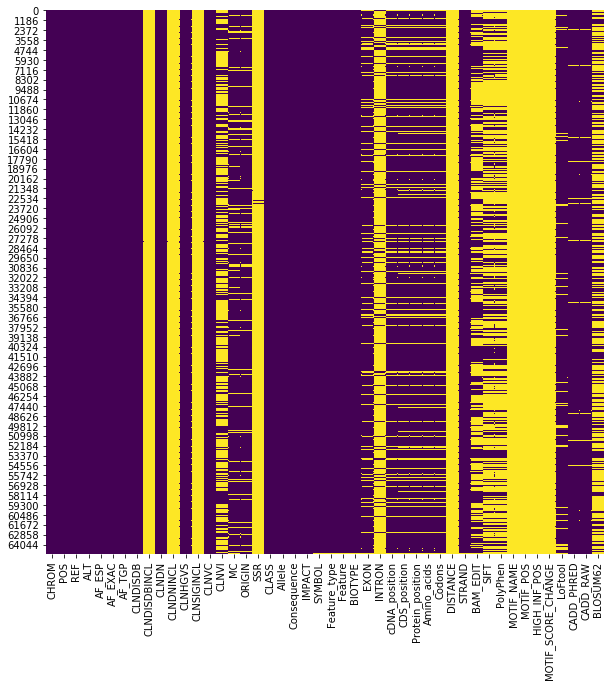

In [52]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)

In [53]:
toBeConsidered = ['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP',
       'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNVC','MC', 'ORIGIN', 'CLASS',
       'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type',
       'Feature', 'BIOTYPE', 'STRAND','CADD_PHRED', 'CADD_RAW']
df2 = df[toBeConsidered]
df2 = df2.dropna()

In [54]:
cutdowns = []
for i in df2.columns.values:
    if df2[i].nunique() < 1000:
        cutdowns.append(i)
print("The selected Columns for training are : ", cutdowns)

The selected Columns for training are :  ['CHROM', 'REF', 'ALT', 'CLNVC', 'MC', 'ORIGIN', 'CLASS', 'Allele', 'Consequence', 'IMPACT', 'Feature_type', 'BIOTYPE', 'STRAND']


In [55]:
df_final = df2[cutdowns]

In [56]:
df_final['CHROM'] = df_final['CHROM'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features = 5, input_type = 'string')
hashed1 = fh.fit_transform(df_final['REF'])
hashed1 = hashed1.toarray()
hashedFeatures1 = pd.DataFrame(hashed1)

In [58]:
nameList = {}
for i in hashedFeatures1.columns.values:
    nameList[i] = "REF"+str(i+1)


hashedFeatures1.rename(columns = nameList, inplace = True)
print("The Hashed REF table is somethinng like this : \n",hashedFeatures1.head())

The Hashed REF table is somethinng like this : 
    REF1  REF2  REF3  REF4  REF5
0   0.0   0.0   0.0   0.0   1.0
1   0.0   0.0   0.0   0.0   1.0
2   0.0   0.0   0.0   0.0   1.0
3   0.0  -1.0   0.0   0.0   0.0
4   0.0  -1.0   0.0   0.0   0.0


In [59]:
hashed2 = fh.fit_transform(df_final['ALT'])
hashed2 = hashed2.toarray()
hashedFeatures2 = pd.DataFrame(hashed2)

nameList2 = {}
for i in hashedFeatures2.columns.values:
    nameList2[i] = "ALT"+str(i+1)


hashedFeatures2.rename(columns = nameList2, inplace = True)
print("The Hashed ALT table is somethinng like this : \n",hashedFeatures2.head())

The Hashed ALT table is somethinng like this : 
    ALT1  ALT2  ALT3  ALT4  ALT5
0   0.0  -1.0   0.0   0.0   0.0
1   0.0  -1.0   0.0   0.0   0.0
2   0.0  -1.0   0.0   0.0   0.0
3   0.0  -1.0   0.0   0.0   0.0
4   0.0  -1.0   0.0   0.0   0.0


In [60]:
binaryFeature1 = pd.get_dummies(df_final['CLNVC'])
print("While the One hot encoded matrix of CLNVC Columns is like this : \n")
binaryFeature1.head()

While the One hot encoded matrix of CLNVC Columns is like this : 



,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [61]:
df_final = df_final.drop(columns=['MC'], axis = 1)

In [62]:
hashed0 = fh.fit_transform(df_final['CHROM'])
hashed0 = hashed0.toarray()
hashedFeatures0 = pd.DataFrame(hashed0)

nameList0 = {}
for i in hashedFeatures0.columns.values:
    nameList0[i] = "CHROM"+str(i+1)


hashedFeatures0.rename(columns = nameList0, inplace = True)
hashedFeatures0.head()

,CHROM1,CHROM2,CHROM3,CHROM4,CHROM5
0,0.0,0.0,-1.0,0.0,0.0
1,0.0,0.0,-1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0
3,0.0,0.0,-1.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0


In [63]:
hashed3 = fh.fit_transform(df_final['Allele'])
hashed3 = hashed3.toarray()
hashedFeatures3 = pd.DataFrame(hashed3)

nameList3 = {}
for i in hashedFeatures3.columns.values:
    nameList3[i] = "Allele"+str(i+1)


hashedFeatures3.rename(columns = nameList3, inplace = True)
hashedFeatures3.head()

,Allele1,Allele2,Allele3,Allele4,Allele5
0,0.0,-1.0,0.0,0.0,0.0
1,0.0,-1.0,0.0,0.0,0.0
2,0.0,-1.0,0.0,0.0,0.0
3,0.0,-1.0,0.0,0.0,0.0
4,0.0,-1.0,0.0,0.0,0.0


In [64]:
hashed4 = fh.fit_transform(df_final['Consequence'])
hashed4 = hashed4.toarray()
hashedFeatures4 = pd.DataFrame(hashed4)

nameList4 = {}
for i in hashedFeatures4.columns.values:
    nameList4[i] = "Consequence"+str(i+1)


hashedFeatures4.rename(columns = nameList4, inplace = True)
hashedFeatures4.head()

,Consequence1,Consequence2,Consequence3,Consequence4,Consequence5
0,3.0,-1.0,0.0,0.0,-4.0
1,3.0,0.0,1.0,2.0,-4.0
2,3.0,-1.0,0.0,0.0,-4.0
3,3.0,0.0,1.0,2.0,-4.0
4,3.0,0.0,1.0,2.0,-4.0


In [65]:
df_final['IMPACT'].nunique()

4

In [66]:
binaryFeature3 = pd.get_dummies(df_final['IMPACT'])
binaryFeature3.head()

,HIGH,LOW,MODERATE,MODIFIER
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [67]:
df_final = df_final.drop(columns=['Feature_type'], axis = 1)

In [68]:
binaryFeature4 = pd.get_dummies(df_final['BIOTYPE'], drop_first=True)
binaryFeature4.head()

,protein_coding
0,1
1,1
2,1
3,1
4,1


In [69]:
binaryFeature5 = pd.get_dummies(df_final['STRAND'], drop_first=True)
binaryFeature5.head()

,1.0
0,1
1,1
2,1
3,1
4,1


In [70]:
df3 = pd.concat([binaryFeature1, binaryFeature3, binaryFeature4, binaryFeature5, hashedFeatures1 , hashedFeatures2, hashedFeatures3, hashedFeatures4,hashedFeatures0, df_final['CLASS']], axis=1)
df3 = df3.dropna()
df3.rename(columns={1 : "one", 16 : "sixteen"}, inplace = True)
print(df3.columns.values)
df3.head()

['Deletion' 'Duplication' 'Indel' 'Insertion' 'Inversion' 'Microsatellite'
 'single_nucleotide_variant' 'HIGH' 'LOW' 'MODERATE' 'MODIFIER'
 'protein_coding' 'one' 'REF1' 'REF2' 'REF3' 'REF4' 'REF5' 'ALT1' 'ALT2'
 'ALT3' 'ALT4' 'ALT5' 'Allele1' 'Allele2' 'Allele3' 'Allele4' 'Allele5'
 'Consequence1' 'Consequence2' 'Consequence3' 'Consequence4'
 'Consequence5' 'CHROM1' 'CHROM2' 'CHROM3' 'CHROM4' 'CHROM5' 'CLASS']


,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant,HIGH,LOW,MODERATE,...,Consequence2,Consequence3,Consequence4,Consequence5,CHROM1,CHROM2,CHROM3,CHROM4,CHROM5,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,1.0


In [71]:
y=df3.CLASS
x=df3.drop(["CLASS"],axis=1)

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scores_accuracy=[]

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)


prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.731538309245694


In [74]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [75]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [76]:
x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [77]:
x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [78]:
x.head()

,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant,HIGH,LOW,MODERATE,...,Consequence3,Consequence4,Consequence5,CHROM1,CHROM2,CHROM3,CHROM4,CHROM5,prob_0,prob_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.8,0.3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.9,0.2
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.8,0.3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.8,0.3
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.8,0.3


In [79]:
x.drop(columns="prob_0",axis=1).head()

,Deletion,Duplication,Indel,Insertion,Inversion,Microsatellite,single_nucleotide_variant,HIGH,LOW,MODERATE,...,Consequence2,Consequence3,Consequence4,Consequence5,CHROM1,CHROM2,CHROM3,CHROM4,CHROM5,prob_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.2
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-1.0,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.3
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.3
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.3


In [80]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics

T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7656899623836864


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.76569,0.783237,0.105735,0.186318


In [83]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.2343100376163136
Mean Squared Error: 0.2343100376163136
Root Mean Squared Error: 0.4840558207648304


In [84]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred1))  
print(classification_report(y_test1, y_pred1))  

[[7464   75]
 [2292  271]]
             precision    recall  f1-score   support

        0.0       0.77      0.99      0.86      7539
        1.0       0.78      0.11      0.19      2563

avg / total       0.77      0.77      0.69     10102



In [85]:


from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.7505444466442288


In [86]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.7209133504916518 


In [87]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.7505444466442288


In [88]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.31379924767372797


In [89]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.7289645614729756


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.728965,0.271329,0.051323,0.086318


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.728965,0.271329,0.051323,0.086318


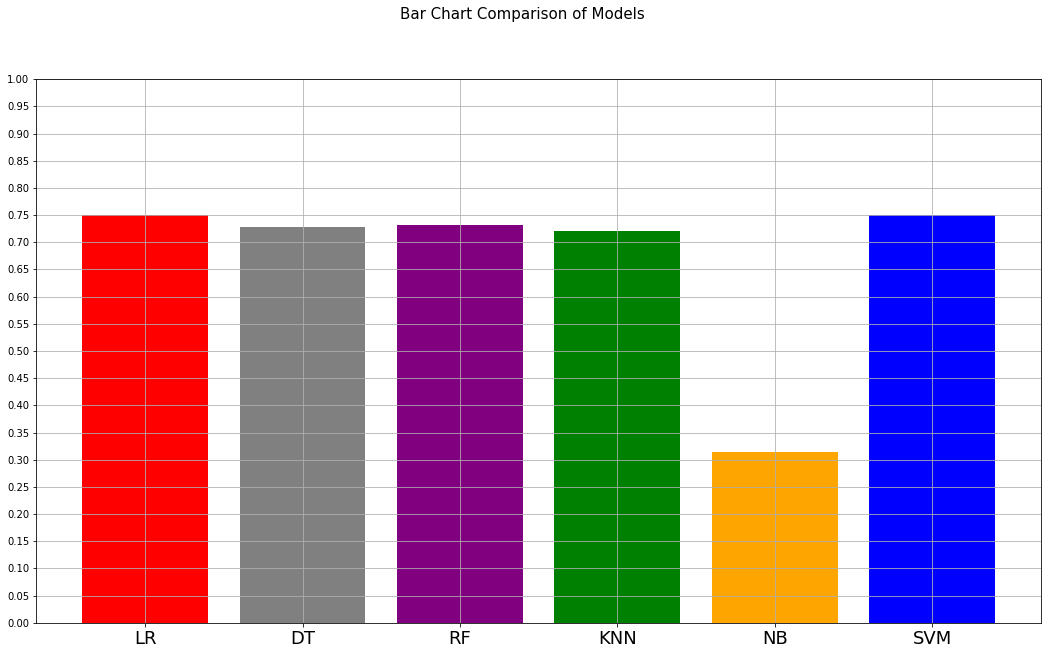

In [92]:
algorithms=("LR","DT","RF","KNN","NB","SVM")
scores = (lr_score,dt_score,rf_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

In [93]:
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))


test accuracy 0.7630172243120175


In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.7182736091862998 


In [95]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.7539101168085528


In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.7449019996040388
